# Riemann Staircase

A notebook to caclulate functions to visualise the prime staircase using Riemann's formula.

In [141]:
from mpmath import *
from sympy import mobius
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange
mp.dps = 30; mp.pretty = True

In [142]:
def Li(x, rho=1):
    return ei(rho * log(x))

In [143]:
def secondary(x, zetazeros):
    res = 0
    for rho in zetazeros:
        a = Li(x, rho) + Li(x, rho.conjugate())
        res += a
    return res

In [144]:
def Ns(x):
    N = 1
    y = x
    while y >= 2:
        if mobius(N) != 0:
            yield N, y
        N += 1
        y = x ** (1/N)

In [145]:
import gzip

with gzip.open("data/zeros6.gz", "rt") as f:
    lines = f.readlines()
zetazeros = [mpc(0.5, float(s.strip())) for s in lines]

An approximation of $\pi(x)$ using the first $n$ Riemann zeros.

In [146]:
def pi_approx(x, n_zeros):
    total = 0
    for N, y in Ns(x):
        row = mobius(N) * (Li(y) - secondary(y, zetazeros[:n_zeros]) - log(2) + quad(lambda t: 1/(t*(t*t-1)*log(t)), [y, inf])) / N
        total += row
    return total

Plot the approximation for a few values of $n$.

In [147]:
def plot_funcs(funcs, rng, npoints=200):
    points = np.linspace(rng[0], rng[1], npoints)
    plt.figure()
    for func in funcs:
        plt.plot(points, [func(p) for p in points])
    plt.plot(points, [0]*npoints, linestyle=':')
plt.rcParams["figure.figsize"]=10,7

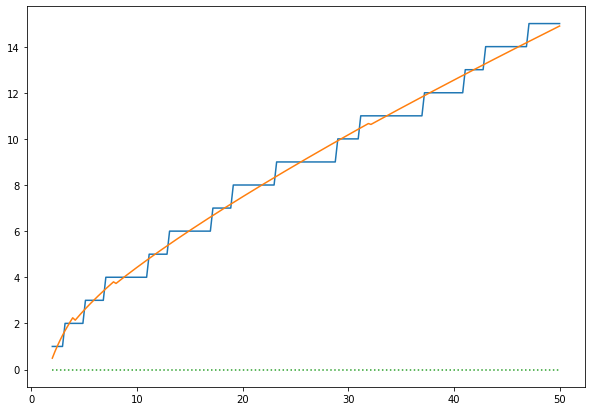

In [148]:
plot_funcs([primepi, pi_approx0], [2, 50], 200)

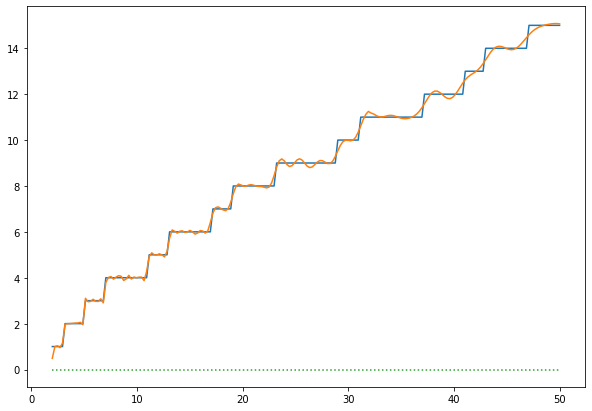

In [149]:
plot_funcs([primepi, pi_approx30], [2, 50], 200)

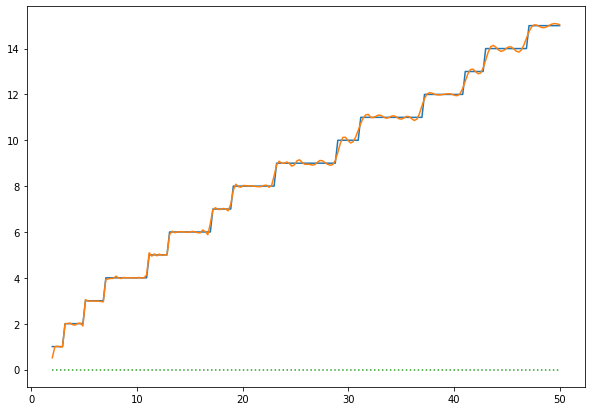

In [150]:
plot_funcs([primepi, pi_approx60], [2, 50], 200)

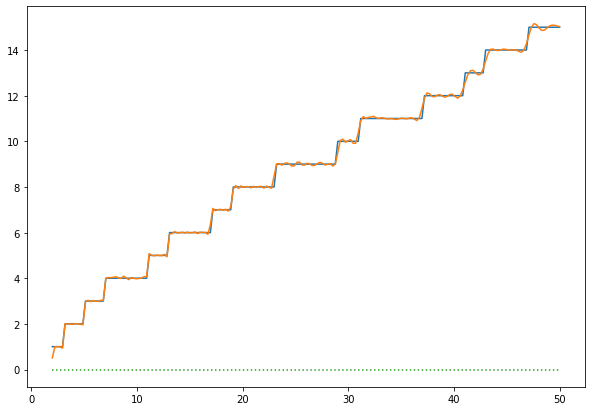

In [151]:
plot_funcs([primepi, pi_approx90], [2, 50], 200)

## Precompute for multiple zeros

In [152]:
%%time
rng = [2, 50]
npoints = 500
n_doublings = 13
points = np.linspace(rng[0], rng[1], npoints)
values = np.zeros((n_doublings, npoints))
n_zeros = 0
for i in range(n_doublings):
    print(i, n_zeros)
    for j in trange(len(points)):
        p = points[j]
        values[i, j] = float(pi_approx(p, n_zeros))
    if n_zeros == 0:
        n_zeros = 1
    else:
        n_zeros *= 2

0 0


  0%|          | 0/500 [00:00<?, ?it/s]

1 1


  0%|          | 0/500 [00:00<?, ?it/s]

2 2


  0%|          | 0/500 [00:00<?, ?it/s]

3 4


  0%|          | 0/500 [00:00<?, ?it/s]

4 8


  0%|          | 0/500 [00:00<?, ?it/s]

5 16


  0%|          | 0/500 [00:00<?, ?it/s]

6 32


  0%|          | 0/500 [00:00<?, ?it/s]

7 64


  0%|          | 0/500 [00:00<?, ?it/s]

8 128


  0%|          | 0/500 [00:00<?, ?it/s]

9 256


  0%|          | 0/500 [00:00<?, ?it/s]

10 512


  0%|          | 0/500 [00:00<?, ?it/s]

11 1024


  0%|          | 0/500 [00:00<?, ?it/s]

12 2048


  0%|          | 0/500 [00:00<?, ?it/s]

CPU times: user 27min 27s, sys: 7.68 s, total: 27min 34s
Wall time: 27min 35s


Export data for use in javascript

In [153]:
pi_values = np.zeros(npoints)
for i, p in enumerate(points):
    pi_values[i] = float(primepi(p))

In [154]:
data = np.empty((values.shape[0] + 2, values.shape[1]))
data[0] = points
data[1:values.shape[0]+1] = values
data[-1] = pi_values
np.savetxt("staircase.csv", data, delimiter=",")

Show an interactive plot using `ipywidgets`

In [155]:
def plot_points(n=0):
    plt.figure()
    plt.plot(points, pi_values)
    plt.plot(points, values[n])
    plt.ylim(0, 16)
    plt.show()

In [156]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt

interactive_plot = interactive(plot_points, n=(0, len(values)-1, 1))
output = interactive_plot.children[-1]
plt.rcParams["figure.figsize"]=10,7
interactive_plot

interactive(children=(IntSlider(value=0, description='n', max=12), Output()), _dom_classes=('widget-interact',…